# The R Notebook for using sleuth

In [ ]:
library(devtools)
library(ggplot2)
library(rhdf5)
load_all(file.path("../../sleuth"))
source(file.path("../../DESeq2"))

: 

In [6]:
so_A549 = readRDS("../data/sleuth_results/so/A549_sleuth_model.rds")

In [11]:
tests(so_A549)

~likelihood ratio tests:
	reduced:full

~wald tests:
	[ full ]
	conditionKD
	conditionNTC
	conditionKO


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): Objekt 'b' nicht gefunden

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(c

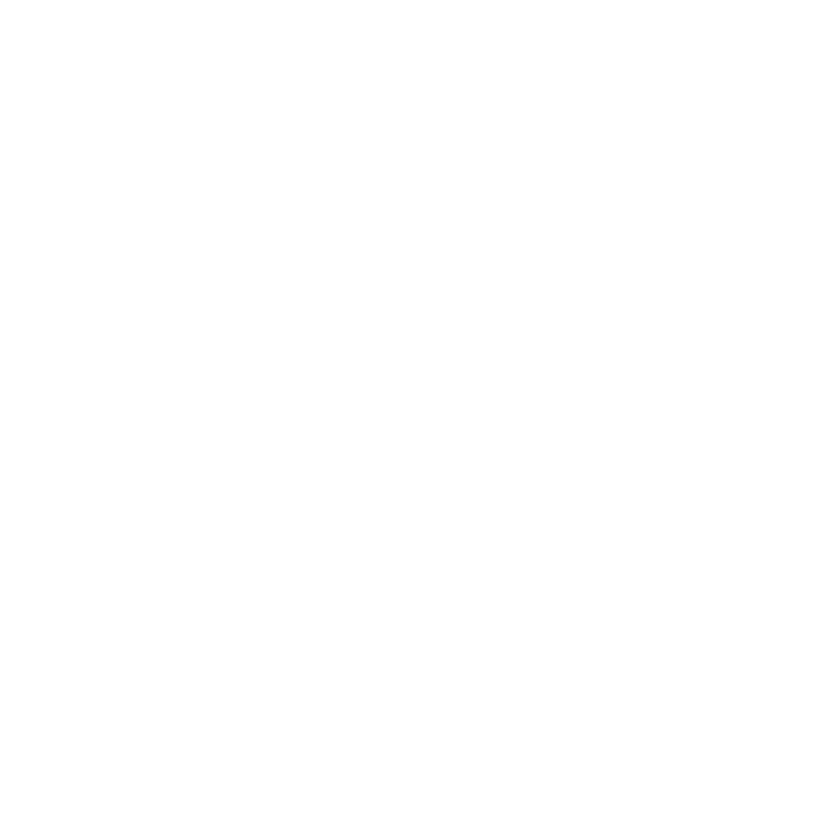

In [12]:
plot_volcano(so_A549, test = "conditionKD", test_type = "wt")

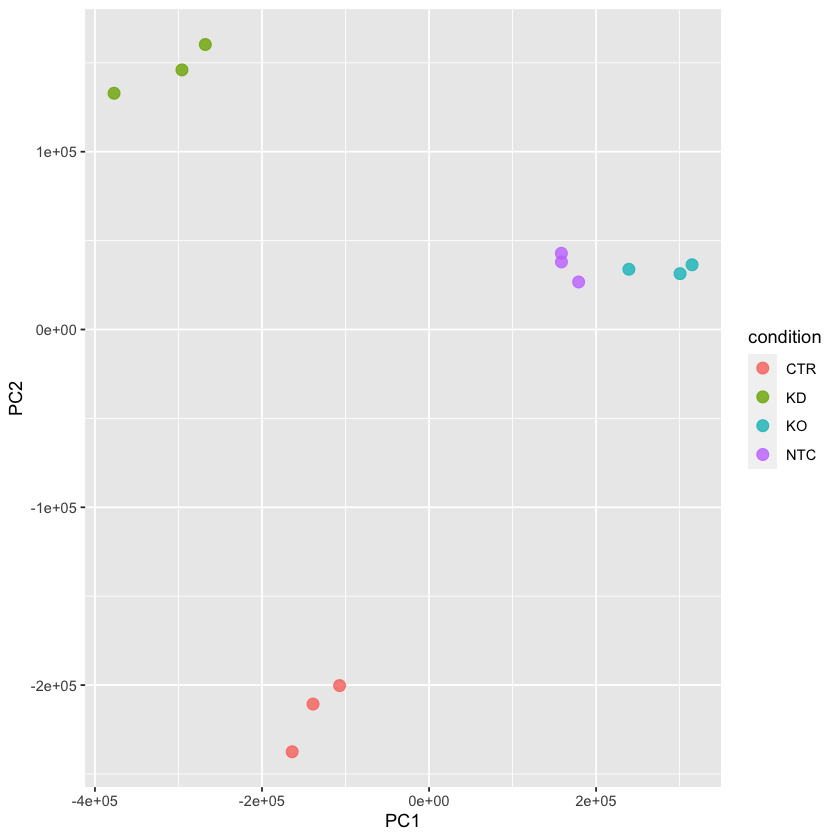

In [15]:
plot_pca(so_A549, color='condition')

In [ ]:
targets1 = read.csv("targets1.csv")

targets1

In [ ]:
# for (target in targets1$target_id) {

#     fig = plot_bootstrap(
#         so, target, color_by = "cell_line", units = "tpm",
#     )

#     ggsave(plot = fig, file.path("Plots/Bootstrap", paste0(target, ".pdf")))
# }

In [ ]:
split_samples = function(metadata, by, named=TRUE) {
    # """
    # This function splits a sample metadata dataframe according to unique valued-subsets according to the by-column (split by the values in that column...)
    # It returns a tuple of subset dataframes.
    # """
    splitted_keys = metadata[by]
    splitted_keys = splitted_keys[!duplicated(splitted_keys),]
    
    subsets = list()
    i = 1
    for (key in splitted_keys) {

        subset = metadata[by] == key
        subset = metadata[subset,]
        
        if (!named) { k = i } else { k = key }
        subsets[[k]] = data.frame(subset)
        i = i + 1
    }

    return(subsets)
}

In [ ]:
cell_line_dfs = split_samples(index2, "cell_line", named = TRUE)
names(cell_line_dfs)[1]

In [ ]:
file.path("hello", "there", "_", "thing")

In [ ]:
split_wt_conditions = function(metadata, column, ref) {
    # This function gets all conditions found within the metadata subset of a given cell-line
    # it returns a dataframe of codes and corresponding names
    # Note that column means the named column, it is assumed that the encoded column is named c_column (where "colunm" is just whatever the named column is named...)

# c_column = paste0("c_", column)

# tmp = metadata#[!(metadata$c_column == 0),]
tmp = metadata[column]
tmp = tmp[!duplicated(tmp),]
tmp = tmp[tmp != ref]
return(tmp)

}

In [ ]:
x = index2[index2$cell_line == "A549",]

c = split_wt_conditions(x, "condition", "CTR")

for (i in c) { print(class(i))}

In [ ]:
index2 = read.csv("index2.csv")

cell_lines = index2["cell_line"]
cell_lines = cell_lines[!duplicated(cell_lines),]
subsets = c()

for (cell_line in cell_lines) {

    subset = index2["cell_line"] == cell_line
    subset = index2[subset,]
    print(subset)
}


In [ ]:
for (cell_line in cell_lines) {

    subset = index2["cell_line"] == cell_line
    subset = index2[subset,]
    for (i in subset[,"condition"]) {
        print(i)
    }
}



In [ ]:
m = so$fits[["full"]]$design_matrix
class(m)

In [ ]:
x = list(1,2,3,4,5,6)

x1 = x[[1]]
xn = tail(x,-1)
xn

In [ ]:
library(aggregation)

chiq(c(0.3, 0.4))

In [43]:
so_a = readRDS(file.path("..", "data", "so", "A549_sleuth_model.rds"))

In [52]:
x = sleuth_results(so_a, "conditionKD", test_type = "wt", which_model = "full",
  rename_cols = TRUE, show_all = TRUE, pval_aggregate = FALSE)

x$qval[x$qval < 10e-320 ] <- 10e-320
plot(x$b, x$qval)

target_id                                                                                                                                   
1      ENST00000226279.8|ENSG00000004468.13|OTTHUMG00000048206.6|OTTHUMT00000250322.3|CD38-201|CD38|5620|protein_coding|                           
2      ENST00000376630.5|ENSG00000204592.9|OTTHUMG00000031155.3|OTTHUMT00000076282.3|HLA-E-201|HLA-E|2548|protein_coding|                          
3      ENST00000075120.12|ENSG00000059804.16|OTTHUMG00000133685.4|OTTHUMT00000257914.2|SLC2A3-201|SLC2A3|3827|protein_coding|                      
4      ENST00000361475.7|ENSG00000198959.12|OTTHUMG00000032437.5|OTTHUMT00000079151.4|TGM2-201|TGM2|4970|protein_coding|                           
5      ENST00000340857.4|ENSG00000189060.6|OTTHUMG00000150659.1|OTTHUMT00000319453.1|H1-0-201|H1-0|2204|protein_coding|                            
6      ENST00000648006.3|ENSG00000166710.21|OTTHUMG00000131247.4|OTTHUMT00000498664.1|B2M-214|B2M|943|protein_coding|                              
7      ENST00000647956.2|ENSG00000159403.18|OTTHUMG00000168149.10|OTTHUMT00000498679.3|C1R-214|C1R|2488|protein_coding|                            
8      ENST00000245907.11|ENSG00000125730.17|OTTHUMG00000150335.7|OTTHUMT00000317636.3|C3-201|C3|5231|protein_coding|                              
9      ENST00000376809.10|ENSG00000206503.13|OTTHUMG00000130501.3|OTTHUMT00000504354.2|HLA-A-203|HLA-A|1535|protein_coding|                        
10     ENST00000380698.5|ENSG00000170542.6|OTTHUMG00000014131.2|OTTHUMT00000039656.2|SERPINB9-201|SERPINB9|4143|protein_coding|                    
11     ENST00000399808.5|ENSG00000142089.17|OTTHUMG00000165542.3|OTTHUMT00000384765.2|IFITM3-201|IFITM3|611|protein_coding|                        
12     ENST00000262776.8|ENSG00000108679.13|OTTHUMG00000177572.8|OTTHUMT00000437785.4|LGALS3BP-201|LGALS3BP|2202|protein_coding|                   
13     ENST00000412585.7|ENSG00000234745.13|OTTHUMG00000031153.7|OTTHUMT00000076280.5|HLA-B-249|HLA-B|1536|protein_coding|                         
14     ENST00000434618.7|ENSG00000231925.12|OTTHUMG00000031090.6|OTTHUMT00000076127.3|TAPBP-234|TAPBP|3450|protein_coding|                         
15     ENST00000319921.4|ENSG00000173821.19|OTTHUMG00000161415.8|OTTHUMT00000415454.2|RNF213-201|RNF213|5316|protein_coding|                       
16     ENST00000287156.9|ENSG00000156587.16|OTTHUMG00000167047.3|OTTHUMT00000392657.2|UBE2L6-201|UBE2L6|1219|protein_coding|                       
17     ENST00000302754.6|ENSG00000171223.6|OTTHUMG00000180373.2|OTTHUMT00000451015.2|JUNB-201|JUNB|1830|protein_coding|                            
18     ENST00000407280.4|ENSG00000216490.4|OTTHUMG00000183373.6|OTTHUMT00000466396.4|IFI30-201|IFI30|988|protein_coding|                           
19     ENST00000225603.9|ENSG00000108468.15|OTTHUMG00000150417.5|OTTHUMT00000318015.2|CBX1-201|CBX1|2182|protein_coding|                           
20     ENST00000250092.11|ENSG00000129226.14|OTTHUMG00000108146.6|OTTHUMT00000226949.5|CD68-201|CD68|1705|protein_coding|                          
21     ENST00000251630.11|ENSG00000104213.13|OTTHUMG00000130818.6|OTTHUMT00000530311.2|PDGFRL-201|PDGFRL|1508|protein_coding|                      
22     ENST00000409652.5|ENSG00000221963.6|OTTHUMG00000150615.3|OTTHUMT00000319081.3|APOL6-201|APOL6|10065|protein_coding|                         
23     ENST00000262293.9|ENSG00000068489.13|OTTHUMG00000179362.3|OTTHUMT00000445949.1|PRR11-201|PRR11|6226|protein_coding|                         
24     ENST00000252483.10|ENSG00000130202.10|OTTHUMG00000180839.3|OTTHUMT00000453231.3|NECTIN2-201|NECTIN2|2690|protein_coding|                    
25     ENST00000560741.5|ENSG00000172183.16|OTTHUMG00000148679.4|OTTHUMT00000415507.1|ISG20-210|ISG20|800|protein_coding|                          
26     ENST00000412615.7|ENSG00000135148.12|OTTHUMG00000169640.5|OTTHUMT00000405214.3|TRAFD1-202|TRAFD1|2633|protein_coding|                       
27     ENST

In [45]:
tests(so_a)

~likelihood ratio tests:
	reduced:full

~wald tests:
	[ full ]
	conditionKD
	conditionNTC
	conditionKO


Don't know how to automatically pick scale for object of type function. Defaulting to continuous.
ERROR while rich displaying an object: Error: All columns in a tibble must be vectors.
x Column `x` is a function.

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     rpr <- mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(capture.output(print(obj)), collapse = "\n")
10. capture.output(print(obj))
11. evalVis(expr)
12. withVisible(eval(expr, pf))
13. eval(e

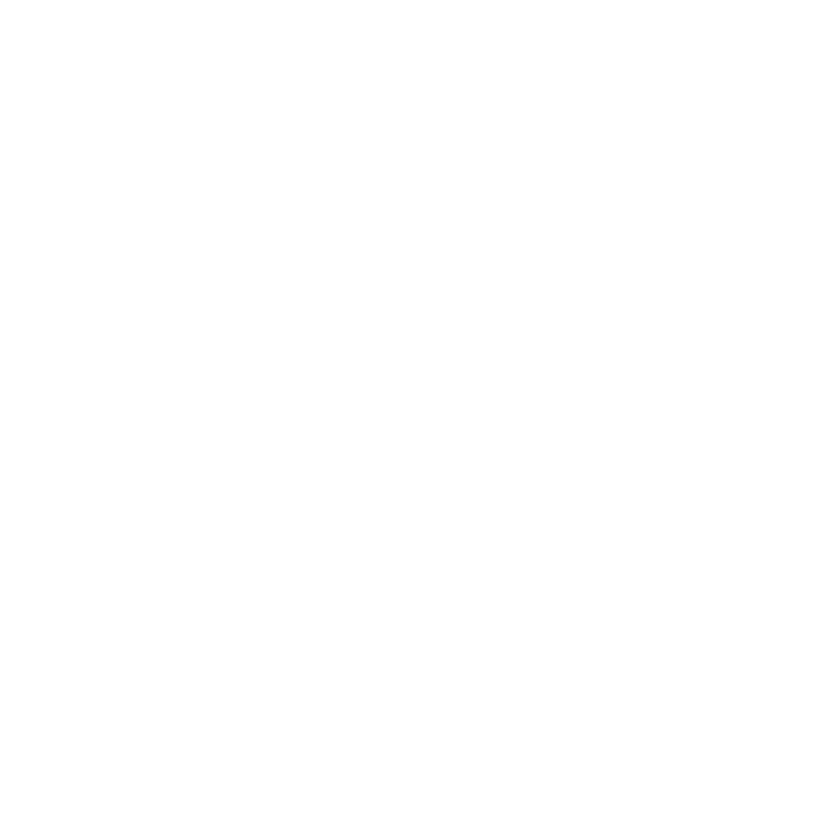

In [46]:
plot_volcano(so_a, test = "conditionKD")

In [ ]:
a <- function(x) {
    r = tryCatch(
        {
            result = 1 / x
        }, warning = function(w) { 
        }, error = function(e) { 
            print("Warning in Function! Using default value instead...")
            # result = NULL
        }
    )
    if (!is.numeric(r)) { result = NULL }
    return(result)
}

a("a")

In [ ]:
b = function(x) { return(x + 1) }

c = function(x, b) { return(b(x)) }

c(5, b)